# Multiple Regression

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# only for notebooks
options(repr.plot.width = 5, repr.plot.height = 4)

## Student Performance

Get back to last week's dataset. This time, though, get also the `student-por.csv`.

In [3]:
student_math = read_csv2('~/git/r-course2020/data/student-mat.csv')

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.
Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)
See spec(...) for full column specifications.


In [4]:
glimpse(student_math)

Observations: 395
Variables: 33
$ school     <chr> "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP"…
$ sex        <chr> "F", "F", "F", "F", "F", "M", "M", "F", "M", "M", "F", "F"…
$ age        <dbl> 18, 17, 15, 15, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15…
$ address    <chr> "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U"…
$ famsize    <chr> "GT3", "GT3", "LE3", "GT3", "GT3", "LE3", "LE3", "GT3", "L…
$ Pstatus    <chr> "A", "T", "T", "T", "T", "T", "T", "A", "A", "T", "T", "T"…
$ Medu       <dbl> 4, 1, 1, 4, 3, 4, 2, 4, 3, 3, 4, 2, 4, 4, 2, 4, 4, 3, 3, 4…
$ Fedu       <dbl> 4, 1, 1, 2, 3, 3, 2, 4, 2, 4, 4, 1, 4, 3, 2, 4, 4, 3, 2, 3…
$ Mjob       <chr> "at_home", "at_home", "at_home", "health", "other", "servi…
$ Fjob       <chr> "teacher", "other", "other", "services", "other", "other",…
$ reason     <chr> "course", "course", "other", "home", "home", "reputation",…
$ guardian   <chr> "mother", "father", "mother", "mother", "father", "mother"…
$ traveltime <dbl> 2

**Task A**

1. Using the `student_math` dataset, create a regression object called `model_fit_1` predicting third period grade (G3) based on sex, age, internet, and failures. How do you interpret the regression output? Which variables are significantly related to third period grade?

2. Check the model's assumptions. Which are violated?

3. Load the `student-por.csv` in R as `student_port`. Inspect the dataset first.

4. Create a new regression object called `model_fit_2` using the same variables as question 1: however, this time use the portugese dataset.

5. What are the key differences between the beta values for the portugese dataset (`model_fit_2`) and the math dataset (`model_fit_1`)?

In [5]:
#A1
model_fit_1 = lm(G3 ~ sex + age + internet + failures, data = student_math)
summary(model_fit_1)

# Sex and failures predict third period grade. 
# Men perform better than women (b = 1.04, p = 0.015), 
# and the more failures a person has the lower their grade (b = -2.13, p<.01).


Call:
lm(formula = G3 ~ sex + age + internet + failures, data = student_math)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2156  -1.9523   0.0965   3.0252   9.4370 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.9962     2.9808   4.695 3.69e-06 ***
sexM          1.0451     0.4282   2.441   0.0151 *  
age          -0.2407     0.1735  -1.388   0.1660    
internetyes   0.7855     0.5761   1.364   0.1735    
failures     -2.1260     0.2966  -7.167 3.86e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.237 on 390 degrees of freedom
Multiple R-squared:  0.1533,	Adjusted R-squared:  0.1446 
F-statistic: 17.65 on 4 and 390 DF,  p-value: 2.488e-13


In [6]:
#A2
library(lsr)
library(lmtest)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [7]:
student_math = mutate(student_math,
                      sex_binary = case_when(sex == 'F' ~ 0,
                                             sex == 'M' ~ 1),
                      internet_binary = case_when(internet == 'yes' ~ 1,
                                                  internet == 'no' ~ 0)
                     )
head(select(student_math, sex_binary, age, internet_binary, failures))

sex_binary,age,internet_binary,failures
<dbl>,<dbl>,<dbl>,<dbl>
0,18,0,0
0,17,1,0
0,15,1,3
0,15,1,0
0,16,0,0
1,16,1,0


,sex_binary,age,internet_binary,failures
sex_binary,NA,-0.02860579,0.04411290,0.04443588
age,-0.02860579,NA,-0.11209351,0.24366538
internet_binary,0.04411290,-0.11209351,NA,-0.06345124
failures,0.04443588,0.24366538,-0.06345124,NA
,sex_binary,age,internet_binary,failures
sex_binary,NA,1.000000e+00,1.0000000,1.000000e+00
age,1,NA,0.1294762,5.707129e-06
internet_binary,1,1.294762e-01,NA,8.330751e-01
failures,1,5.707129e-06,0.8330751,NA
,sex_binary,age,internet_binary,failures


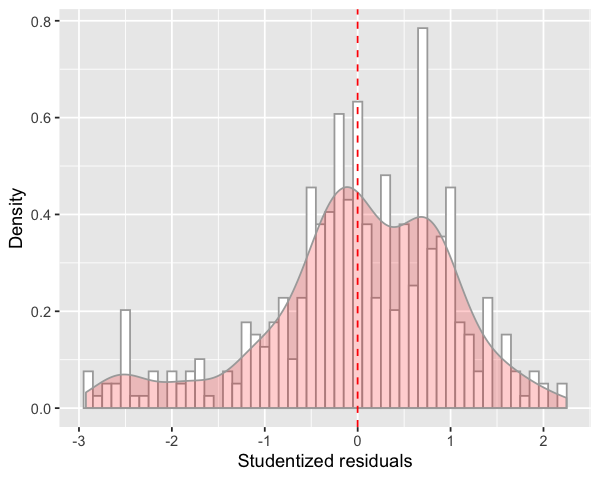

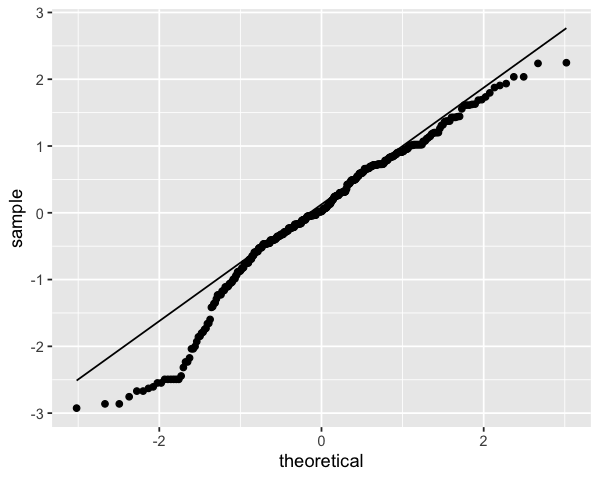


	Shapiro-Wilk normality test

data:  model_checks$res_stu
W = 0.96112, p-value = 1.007e-08



	studentized Breusch-Pagan test

data:  model_fit_1
BP = 6.9372, df = 4, p-value = 0.1392


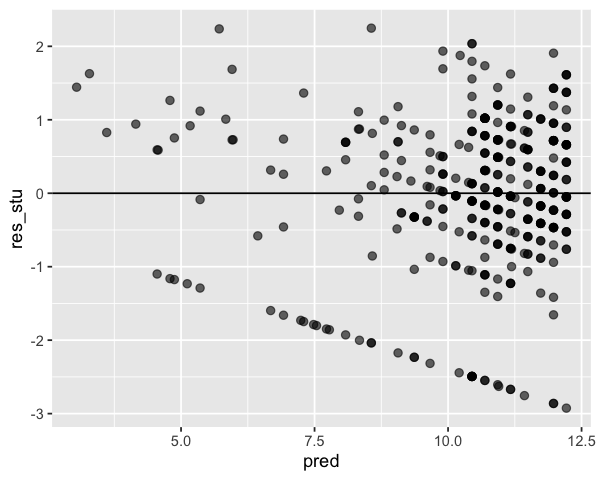

In [8]:
correlate(as.data.frame(select(student_math, sex_binary, age, internet_binary, failures)), test=TRUE)

res_stu = rstudent(model = model_fit_1)
pred = model_fit_1$fitted.values
model_checks = data.frame(pred = pred, res_stu = res_stu)
model_checks = as_tibble(model_checks)

ggplot(data = model_checks, mapping = aes(x = res_stu)) + 
    geom_histogram(aes(y=..density..), binwidth=.1, colour="darkgrey", fill="white") +
    labs(x = 'Studentized residuals', y='Density') + 
    geom_density(alpha=.2, fill="red", colour="darkgrey")  +
    geom_vline(aes(xintercept=mean(res_stu)), color="red", linetype="dashed", size=.5)

ggplot(model_checks, mapping = aes(sample = res_stu)) +
    stat_qq() + 
    stat_qq_line()

ggplot(data = model_checks, mapping = aes(x = pred, y = res_stu)) + 
    geom_point(alpha = 0.6, size= 2) + 
    geom_hline(yintercept=0)

shapiro.test(model_checks$res_stu)
bptest(model_fit_1)

# It looks like age and failure are actually correlated.
# This could affect interpretation of the corresponding coefficients.
# It also looks like the residuals are not normally distriburted.

In [9]:
#A3
student_por = read_csv2('~/git/r-course2020/data/student-por.csv')
glimpse(student_por)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.
Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)
See spec(...) for full column specifications.


Observations: 649
Variables: 33
$ school     <chr> "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP"…
$ sex        <chr> "F", "F", "F", "F", "F", "M", "M", "F", "M", "M", "F", "F"…
$ age        <dbl> 18, 17, 15, 15, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15…
$ address    <chr> "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U"…
$ famsize    <chr> "GT3", "GT3", "LE3", "GT3", "GT3", "LE3", "LE3", "GT3", "L…
$ Pstatus    <chr> "A", "T", "T", "T", "T", "T", "T", "A", "A", "T", "T", "T"…
$ Medu       <dbl> 4, 1, 1, 4, 3, 4, 2, 4, 3, 3, 4, 2, 4, 4, 2, 4, 4, 3, 3, 4…
$ Fedu       <dbl> 4, 1, 1, 2, 3, 3, 2, 4, 2, 4, 4, 1, 4, 3, 2, 4, 4, 3, 2, 3…
$ Mjob       <chr> "at_home", "at_home", "at_home", "health", "other", "servi…
$ Fjob       <chr> "teacher", "other", "other", "services", "other", "other",…
$ reason     <chr> "course", "course", "other", "home", "home", "reputation",…
$ guardian   <chr> "mother", "father", "mother", "mother", "father", "mother"…
$ traveltime <dbl> 2

In [10]:
#A4
model_fit_2 = lm(G3 ~ sex + age + internet + failures, data = student_por)
summary(model_fit_2)

#A5
# In the portugese datset, men do worse than women (b = -0.72, p < .01), 
# and internet actually helps performance (b = 0.93, p < .01)! 
# Failures still lower grades (b = -2.05, p < .01).


Call:
lm(formula = G3 ~ sex + age + internet + failures, data = student_por)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8941  -1.8345   0.0522   1.8807   7.8041 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.61020    1.68101   6.907 1.19e-11 ***
sexM        -0.71515    0.23625  -3.027 0.002568 ** 
age          0.01986    0.10031   0.198 0.843134    
internetyes  0.92639    0.27508   3.368 0.000803 ***
failures    -2.04819    0.20738  -9.877  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.936 on 644 degrees of freedom
Multiple R-squared:  0.1794,	Adjusted R-squared:  0.1743 
F-statistic: 35.19 on 4 and 644 DF,  p-value: < 2.2e-16


**Task B**

1. Using the `student_math` dataset, create a regression object called `model_fit_3` predicting first period grade (G1) based on guardian. Guardian is a nominal variable with 3 levels.

2. Use `summary` to look at the output. You should see 2 predictors listed ("guardianmother" and "guardiananother"), rather than the expected 1 ("guardian"). `lm` has dummy coded your variables with "father" set as the reference group. Look at the levels of the guardian factor to see why "father" is the reference group.  How would you interpret the results? 

3. What is the predicted grade for those with a father as their guardian? Those with a mother? Those with other? Compare these to the means of each group again.

In [11]:
#B1
model_fit_3 = lm(G1 ~ guardian, data = student_math)

#B2
summary(model_fit_3)

#B3
# We can use our three estimates to calculate these predictions like we did in Question 11. 
# father is a reference group/coded as 0, so the predicted grade is the intercept estimate (11.11). 
# For the other two groups we just need to add their estimate to the intercept, 
# therefore our predicted grade for those with a mother is 10.88 
# and for those with other it is 10.56.

summarize(group_by(student_math, guardian),
          mean_G1 = mean(G1))


Call:
lm(formula = G1 ~ guardian, data = student_math)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8828 -2.8828 -0.1111  2.1172  8.1172 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     11.1111     0.3505  31.705   <2e-16 ***
guardianmother  -0.2283     0.4041  -0.565    0.572    
guardianother   -0.5486     0.6843  -0.802    0.423    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.325 on 392 degrees of freedom
Multiple R-squared:  0.001775,	Adjusted R-squared:  -0.003318 
F-statistic: 0.3486 on 2 and 392 DF,  p-value: 0.7059


guardian,mean_G1
<chr>,<dbl>
father,11.11111
mother,10.88278
other,10.56250


**Task C**

1. Using the `student_math` dataset, create a regression object called `model_fit_4` predicting a student's first period grade (G1) based on all variables in the dataset (*Hint*: use the notation `formula = y ~ .` to include all variables)

2. Save the fitted values from the `model_fit_4` object as a vector called `model_4_fitted`.

3. Using the `student_math` dataset, create a scatterplot showing the relationship between a student's first period grade (G1) and the fitted values from the model. Does the model appear to correctly fit a student's first period grade? Use `geom_abline()` with `slope=1` and `intercept=0` to plot the identity line and better answer to this question.

4. Create a new regression object, called `model_fit_5` which doesn't include G2 or G3 as predictors, but still includes all other variables. Save the fitted values from the `model_fit_5` object as a vector called `model_5_fitted`.

5. Plot the predicted grades against the actual ones, as predicted by model `model_fit_5`, as in question 3. How well does the new model perform now?

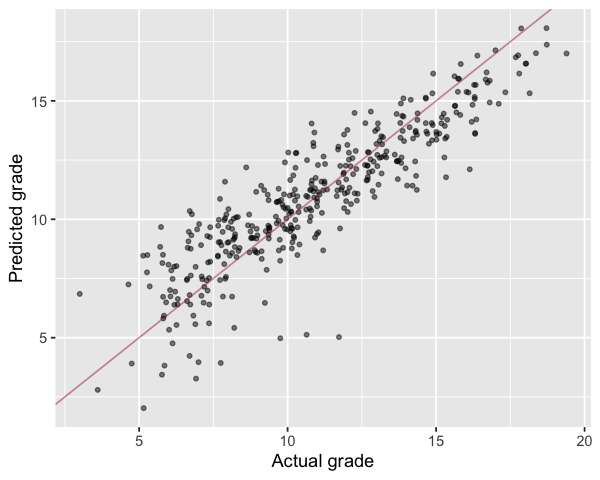

In [12]:
#C1
model_fit_4 = lm(G1 ~ ., data = student_math)

#C2
model_4_fitted = model_fit_4$fitted.values

student_math$predicted_values = model_4_fitted

#C3
ggplot(data = student_math, aes(x = G1, y = predicted_values)) +
  geom_jitter(alpha=.5, size=1) + 
  geom_abline(slope=1, intercept=0, color='maroon', alpha=.5) + 
  labs(x='Actual grade', y='Predicted grade')

# Yes it seems to work well. 
# This is probably because we are including both G2 and G3 as predictors.


Call:
lm(formula = G1 ~ ., data = select(student_math, -predicted_values, 
    -G2, -G3))

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5043 -1.9410 -0.0326  1.7997  7.1376 

Coefficients: (2 not defined because of singularities)
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      11.375064   3.113004   3.654 0.000297 ***
schoolMS          0.009965   0.549925   0.018 0.985553    
sexM              0.894290   0.347385   2.574 0.010448 *  
age              -0.070082   0.150905  -0.464 0.642639    
addressU          0.150710   0.405805   0.371 0.710571    
famsizeLE3        0.429175   0.339195   1.265 0.206602    
PstatusT          0.154297   0.502913   0.307 0.759170    
Medu              0.117943   0.224515   0.525 0.599688    
Fedu              0.143774   0.192870   0.745 0.456496    
Mjobhealth        0.926137   0.776837   1.192 0.233983    
Mjobother        -0.782287   0.495455  -1.579 0.115244    
Mjobservices      0.466532   0.554282   0.842 0.400

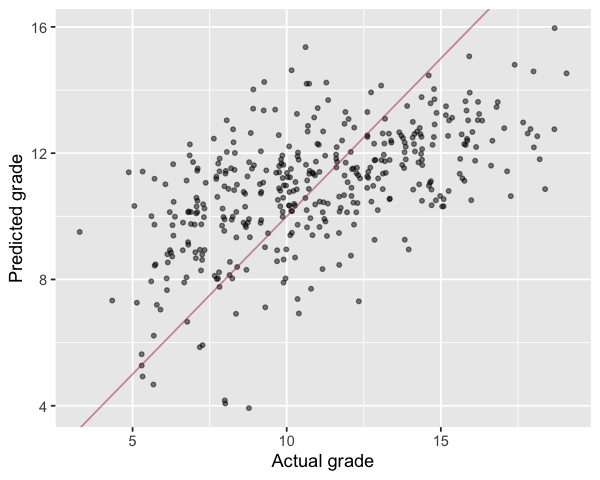

In [13]:
#C4
model_fit_5 = lm(G1 ~ ., data = select(student_math, -predicted_values, -G2, -G3))

model_5_fitted = model_fit_5$fitted.values

student_math$predicted_values = model_5_fitted

summary(model_fit_5)

#C5
ggplot(data = student_math, aes(x = G1, y = predicted_values)) +
  geom_jitter(alpha=.5, size=1) + 
  geom_abline(slope=1, intercept=0, color='maroon', alpha=.5) + 
  labs(x='Actual grade', y='Predicted grade')

# It's performing a lot worse (Actually still explains like 30% of the variability so not that bad)

## Submit your assignment

Save and email your script to me at [laura.fontanesi@unibas.ch](mailto:laura.fontanesi@unibas.ch) by the end of **Friday, 1st May**.